In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ncf = pd.read_csv("./SD_analysis_random_ncf.csv")
nk2 = pd.read_csv("./SD_analysis_random_nk2.csv")
nk3 = pd.read_csv("./SD_analysis_random_nk3.csv")
bbm = pd.read_csv("./SD_analysis_bbm-bnet-inputs-random.csv")
bbm_agg = bbm.copy()
bbm_agg["name"] = bbm_agg["name"].apply(lambda x: x.split("_")[0])
bbm_agg = bbm_agg.groupby("name").mean().reset_index()

In [3]:
# make each bbm model have 128 samples of source combinations
bbm_counts = bbm["name"].apply(lambda x: x.split("_")[0]).value_counts().to_dict()

for name in bbm_counts:
    if bbm_counts[name] < 128:
        number_of_extra_copies = int(128 / bbm_counts[name] - 1)

        array = bbm[bbm["name"].str.startswith(name)] 
        array_128 = pd.concat([array] * number_of_extra_copies)

        bbm = pd.concat([bbm, array_128])

bbm.sort_index(inplace=True)
bbm.reset_index(inplace=True)

# models_with_less_than_128 = 0
# for i in bbm_counts:
#     if bbm_counts[i] < 128:
#         models_with_less_than_128 += 1
# print(f"{models_with_less_than_128=}")

In [4]:
ncf.head()

,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
0,001_000,318,3,1,2,2,0
1,001_001,318,7,2,4,4,0
2,001_002,320,7,3,2,2,0
3,001_003,317,34,5,7,7,0
4,001_004,321,6,3,2,2,0


In [5]:
nk2.head()

,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
0,001_000,321,3,1,2,2.0,0.0
1,001_001,321,16,4,3,3.0,0.0
2,001_002,321,1,0,1,1.0,0.0
3,001_003,321,9,3,2,2.0,0.0
4,001_004,321,1,0,1,1.0,0.0


In [6]:
nk3.head()

,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
0,001_000,321,14,4,2,2.0,0.0
1,001_001,321,48,4,8,8.0,0.0
2,001_002,321,3,1,2,2.0,0.0
3,001_003,321,9,3,2,2.0,0.0
4,001_004,321,31,6,4,4.0,0.0


In [7]:
bbm.head()

,index,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
0,0,001_0000000000011111000,321,1.0,0.0,1.0,1.0,0.0
1,1,001_0000001000011000011,321,1.0,0.0,1.0,1.0,0.0
2,2,001_0000001000110110001,321,1.0,0.0,1.0,1.0,0.0
3,3,001_0000010000000111100,321,1.0,0.0,1.0,1.0,0.0
4,4,001_0000010011101011100,321,1.0,0.0,1.0,1.0,0.0


In [8]:
bbm_agg.head()

,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
0,001,321.0,1.031250,0.015625,1.015625,1.015625,0.0
1,002,139.0,33752.298246,NaN,312.619469,312.619469,0.0
2,003,20.0,2.000000,0.500000,1.500000,1.500000,0.0
3,004,247.0,NaN,NaN,NaN,NaN,NaN
4,005,28.0,7.000000,4.000000,1.000000,1.000000,0.0


In [9]:
frames = {
    "Nested Canalizing": ncf,
    "Critical NK (K=2)": nk2,
    "Critical NK (K=3)": nk3,
    "BBM (Fixed)": bbm,
    "BBM (Aggregate)": bbm_agg,
}
network_type_colors = {
    "Nested Canalizing": "#228833",
    "Critical NK (K=2)": "#66ccee",
    "Critical NK (K=3)": "#4477aa",
    "BBM (Fixed)": "#ee6677",
    "BBM (Aggregate)": "#aa3377",
}

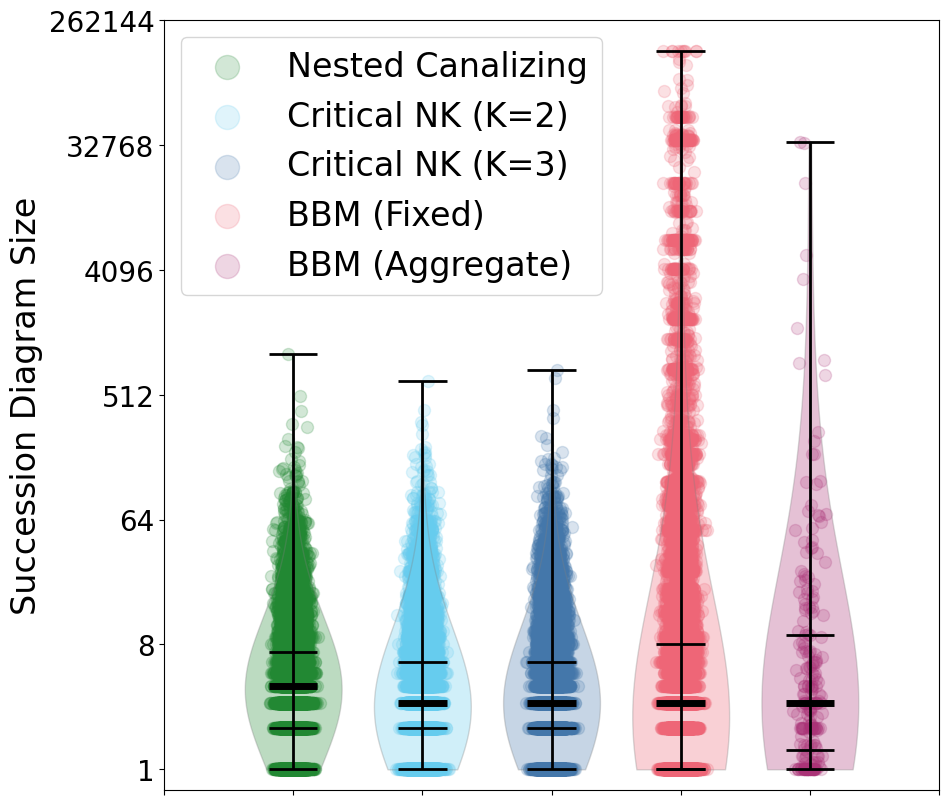

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
hscale = 0.2
for name_pos, (name, df) in enumerate(frames.items()):
    arr = np.log2(
        df["sd size"][(df["N"] >= 4) & (df["N"] < 512)]
    )
    arr = arr[~np.isnan(arr)]
    ax.scatter(
        (name_pos - 2) * hscale + np.random.normal(0, 0.01, len(arr)),
        arr,
        alpha=0.2,
        color=network_type_colors[name],
        label=name,
        s=75,
    )
    if len(set(arr)) > 4:
        vp = ax.violinplot(
            arr,
            [(name_pos - 2) * hscale],
            widths=hscale*0.75,
            quantiles=[0.25, 0.75],
            showmedians=True,
            bw_method=1.0,
        )
        for partname in vp:
            if partname == "bodies":
                continue
            vp[partname].set_edgecolor("black")
            vp[partname].set_linewidth(2)

        vp["cmedians"].set_linewidth(5)
        # vp["cmeans"].set_color("red")

        for body in vp["bodies"]:
            body.set_facecolor(network_type_colors[name])
            body.set_edgecolor("grey")
            body.set_alpha(0.3)

ax.legend(fontsize=24, markerscale=2, loc="upper left")

# ax.set_xlabel("Network Size (Binned)", fontsize=24)
ax.set_ylabel("Succession Diagram Size", fontsize=24)
# xticks = ax.get_xticks().tolist()
# ax.set_xticks(xticks)
ax.set_xticklabels([])
# ax.set_xlim(-0.5, 6.5)
ax.set_xlim(-0.6, 0.6)

# yticks = ax.get_yticks().tolist()
yticks = [0,3,6,9,12,15,18]
ax.set_yticks(yticks)
ax.set_yticklabels([f"{round(2**x)}" for x in yticks])
ax.set_ylim(-0.5, 18)

ax.tick_params(labelsize=20)
fig.savefig("figures/sd_size.png", bbox_inches="tight")

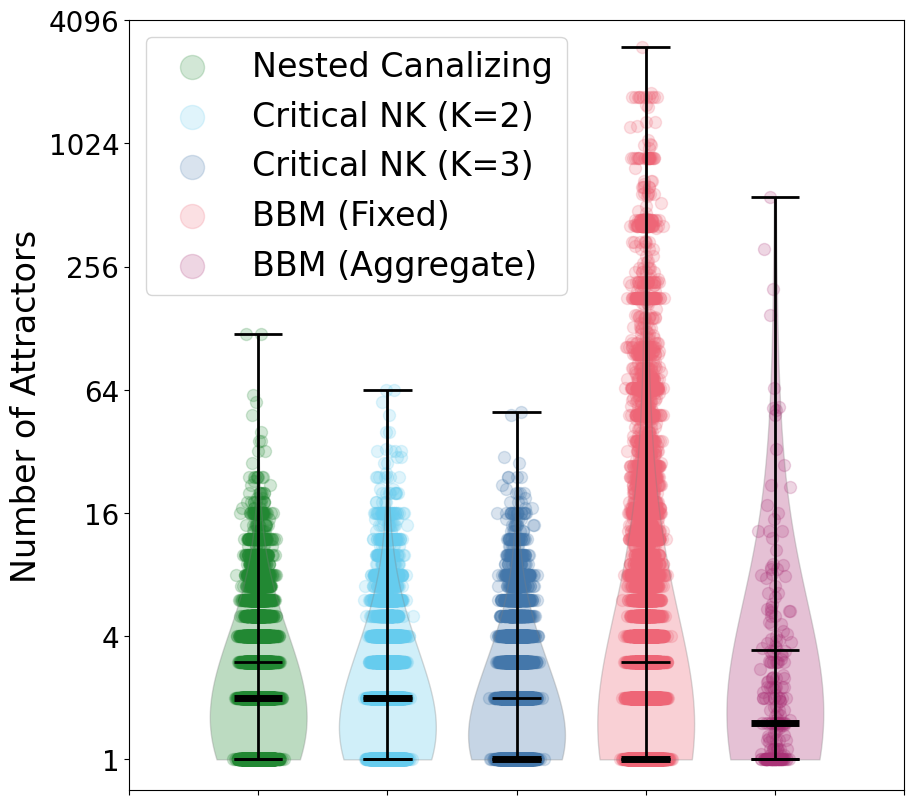

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
hscale = 0.2
for name_pos, (name, df) in enumerate(frames.items()):
    arr = np.log2(
        # df["sd size"][(df["N"] >= 0) & (df["N"] < 640)]
        df["attractors"][(df["N"] >= 4) & (df["N"] < 512)]
    )
    arr = arr[~np.isnan(arr)]
    ax.scatter(
        (name_pos - 2) * hscale + np.random.normal(0, 0.01, len(arr)),
        arr,
        alpha=0.2,
        color=network_type_colors[name],
        label=name,
        s=75,
    )
    if len(set(arr)) > 4:
        vp = ax.violinplot(
            arr,
            [(name_pos - 2) * hscale],
            widths=hscale*0.75,
            quantiles=[0.25, 0.75],
            showmedians=True,
            bw_method=1.0,
        )
        for partname in vp:
            if partname == "bodies":
                continue
            vp[partname].set_edgecolor("black")
            vp[partname].set_linewidth(2)

        vp["cmedians"].set_linewidth(5)
        # vp["cmeans"].set_color("red")

        for body in vp["bodies"]:
            body.set_facecolor(network_type_colors[name])
            body.set_edgecolor("grey")
            body.set_alpha(0.3)

ax.legend(fontsize=24, markerscale=2, loc="upper left")

# ax.set_xlabel("Network Size (Binned)", fontsize=24)
ax.set_ylabel("Number of Attractors", fontsize=24)
# xticks = ax.get_xticks().tolist()
# ax.set_xticks(xticks)
ax.set_xticklabels([])
# ax.set_xlim(-0.5, 6.5)
ax.set_xlim(-0.6, 0.6)

yticks = ax.get_yticks().tolist()
ax.set_yticks(yticks)
ax.set_yticklabels([f"{round(2**x)}" for x in yticks])
ax.set_ylim(-0.5, 12)

ax.tick_params(labelsize=20)
fig.savefig("figures/attractor_scale.png", bbox_inches="tight")

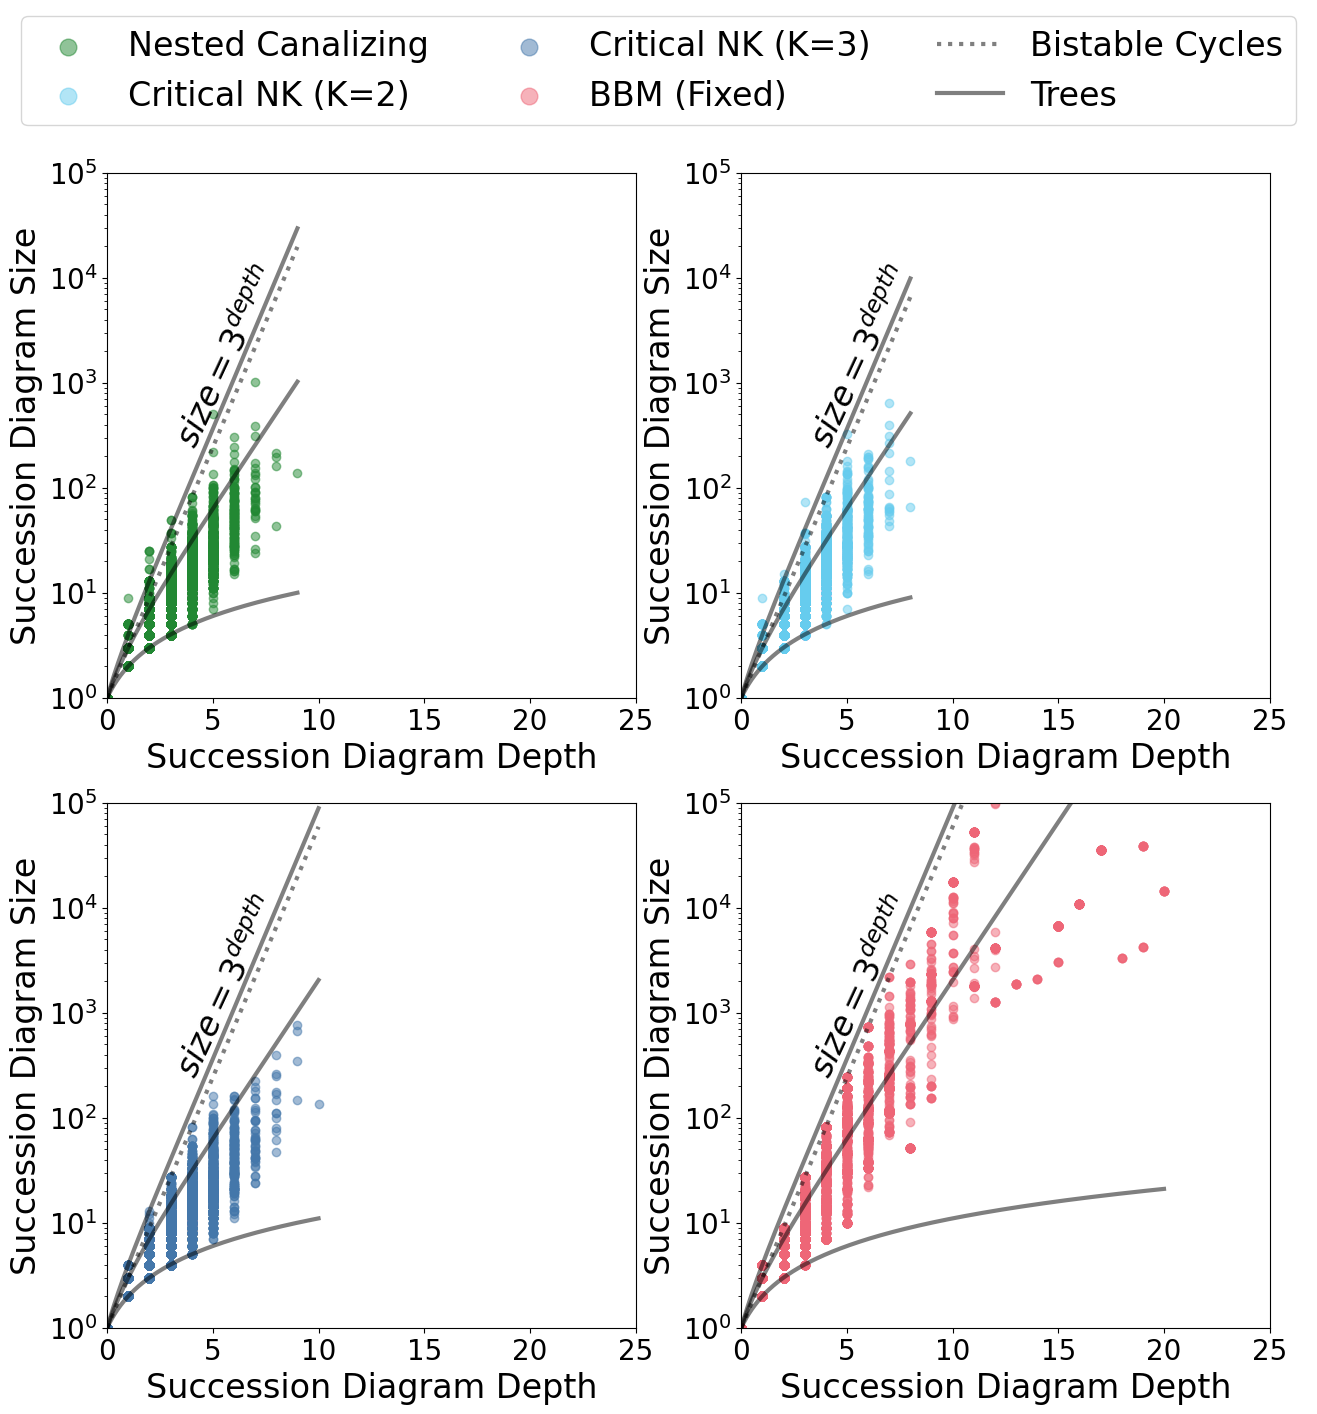

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i, (ax, (name, df)) in enumerate(zip(axs.flatten(), frames.items())):
    ax.scatter(
        df["depth"],
        df["sd size"],
        label=name,
        color=network_type_colors[name],
        alpha=0.5,
    )
    xx = np.linspace(0, df["depth"].max(), 1000)

    ax.plot(
        xx,
        3**xx,
        color="black",
        linewidth=3,
        linestyle="dotted",
        alpha=0.5,
        label="Bistable Cycles" if i == 3 else None,
    )
    ax.annotate(
        "$size = 3^{depth}$",
        xy=(3, 250),
        xytext=(3, 250),
        rotation=65,
        fontsize=24,
    )
    for base in [1, 2, 3]:
        if base > 1:
            yy = (base ** (xx + 1) - 1) / (base - 1)
        else:
            yy = xx + 1
        ax.plot(
            xx,
            yy,
            color="black",
            linewidth=3,
            linestyle="solid" if int(base) == base else "dotted",
            alpha=0.5,
            label="Trees" if i == 3 and base == 1 else None,
        )
    ax.set_ylim(1, 1e5)
    ax.set_xlim(0, 25)
    ax.set_yscale("log")
    ax.set_xlabel("Succession Diagram Depth", fontsize=24)
    ax.set_ylabel("Succession Diagram Size", fontsize=24)
    ax.tick_params(labelsize=20)

# fig.supxlabel("Succession Diagram Depth", fontsize=24)
# fig.supylabel("Succession Diagram Size", fontsize=24)

fig.legend(fontsize=24, ncols=3, markerscale=2, loc="upper center")
fig.savefig("figures/sd_shape_scaling.png", bbox_inches="tight")

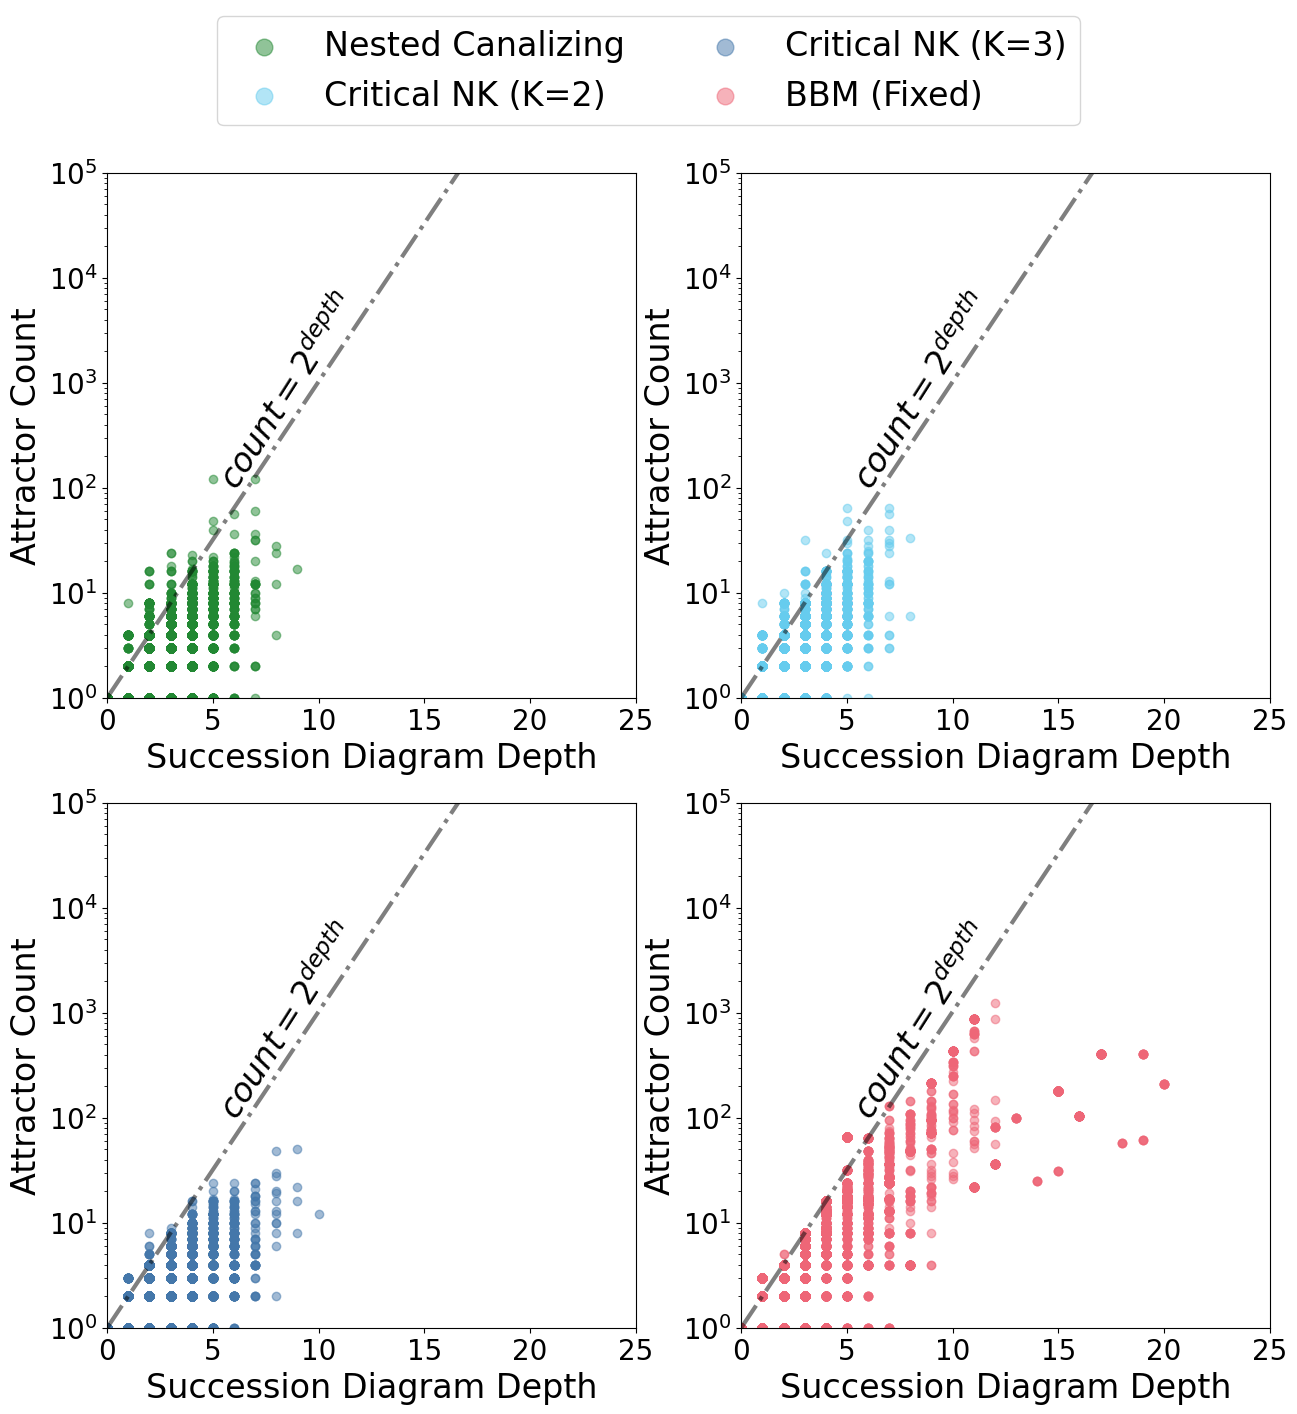

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i, (ax, (name, df)) in enumerate(zip(axs.flatten(), frames.items())):
    ax.scatter(
        df["depth"],
        df["attractors"],
        label=name,
        color=network_type_colors[name],
        alpha=0.5,
    )
    xx = np.linspace(0, 25, 1000)

    ax.plot(
        xx,
        2**xx,
        color="black",
        linewidth=3,
        linestyle="dashdot",
        alpha=0.5,
    )
    ax.annotate(
        "$count = 2^{depth}$",
        xy=(5, 100),
        xytext=(5, 100),
        rotation=57.5,
        fontsize=24,
    )
    ax.set_ylim(1, 1e5)
    ax.set_xlim(0, 25)
    ax.set_yscale("log")
    ax.set_xlabel("Succession Diagram Depth", fontsize=24)
    ax.set_ylabel("Attractor Count", fontsize=24)
    ax.tick_params(labelsize=20)

fig.legend(fontsize=24, ncols=2, markerscale=2, loc="upper center")
fig.savefig("figures/sd_att_scaling.png", bbox_inches="tight")

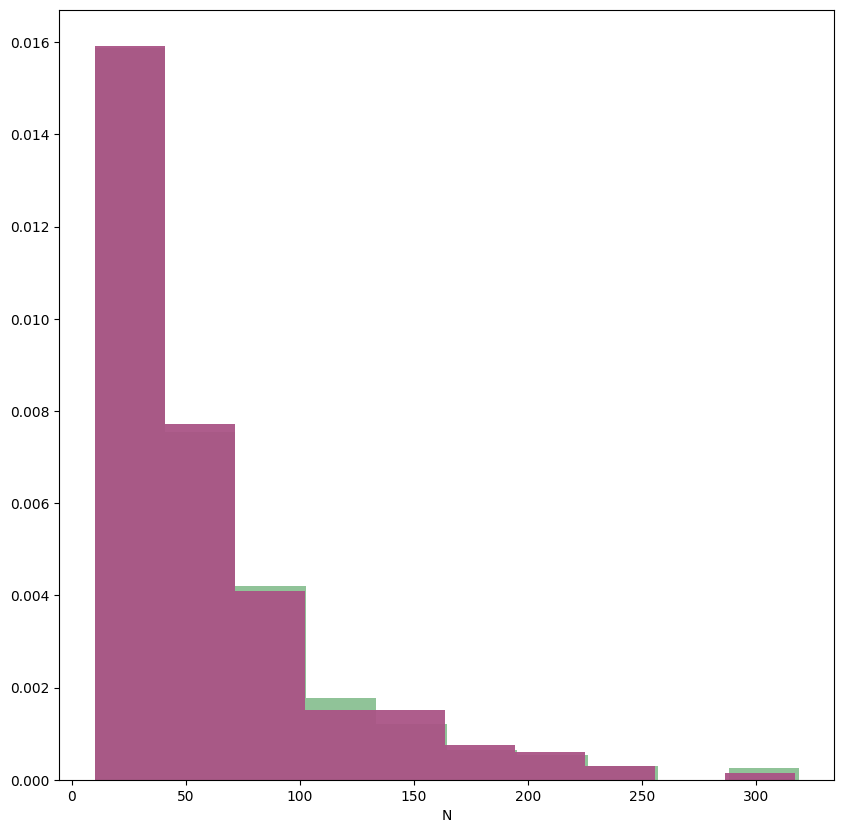

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
for name, df in frames.items():
    ax.hist(
        df["N"][(df["N"] >= 10) & (df["N"] < 320)],
        label=name,
        color=network_type_colors[name],
        alpha=0.5,
        density=True,
    )

ax.set_xlabel("N")
print()

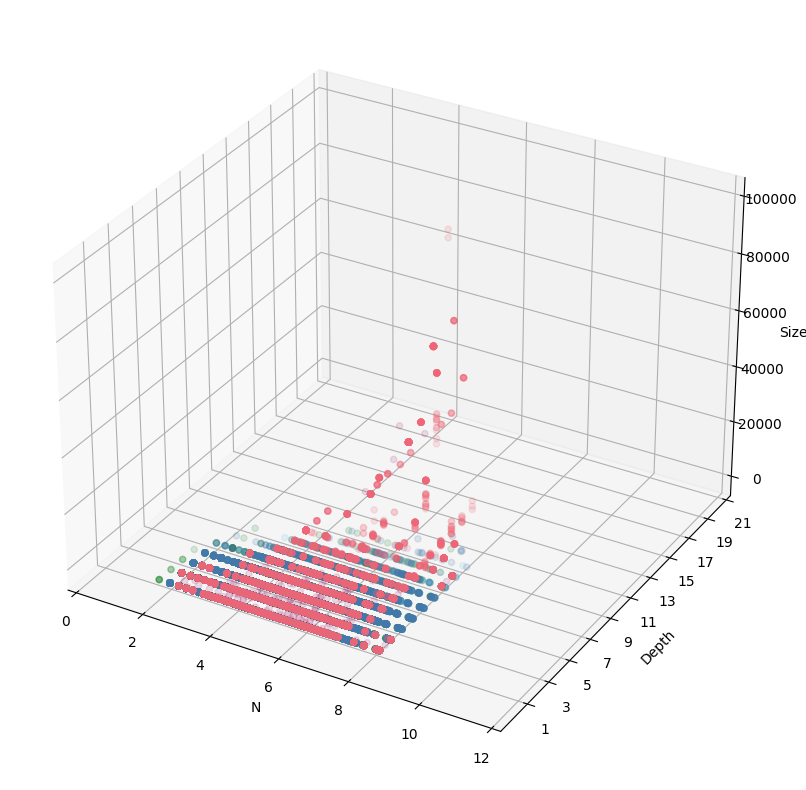

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
for name, frame in frames.items():
    ax.scatter(
        np.log2(frame["N"]),
        frame["depth"],
        frame["sd size"],
        label=name,
        color=network_type_colors[name],
        alpha=0.15,
    )

ax.set_xlabel("N")
ax.set_xlim(0, 12)
ax.set_ylabel("Depth")
ax.set_zlabel("Size")
ax.set_yticks(range(1, 22, 2))
print()